In [102]:

%pip install pip install numpy matplotlib scikit-learn sklearn graphviz mglearn cycler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import mglearn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

4477.68s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [103]:
# leyendo el dataset
df = pd.read_csv("./Marketing.csv", sep=";")

print(df.head())

   age        job  marital    education  default housing loan    contact  \
0  56   housemaid  married  basic.4y     no       no      no   telephone   
1  57   services   married  high.school  unknown  no      no   telephone   
2  37   services   married  high.school  no       yes     no   telephone   
3  40   admin.     married  basic.6y     no       no      no   telephone   
4  56   services   married  high.school  no       no      yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0  may   mon         261       1         999    0         nonexistent   
1  may   mon         149       1         999    0         nonexistent   
2  may   mon         226       1         999    0         nonexistent   
3  may   mon         151       1         999    0         nonexistent   
4  may   mon         307       1         999    0         nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0  1.1           93.994    

In [104]:
print(df.size)

864948


In [105]:
# dropeo registros duplicados
print(df.size)
df.drop_duplicates(keep="last", inplace=True)
print(df.size)

864948
864696


In [106]:
df.shape
df.select_dtypes('object').info()
df = df.fillna(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41176 non-null  object
 1   marital      41176 non-null  object
 2   education    41176 non-null  object
 3   default      41176 non-null  object
 4   housing      41176 non-null  object
 5   loan         41176 non-null  object
 6   contact      41176 non-null  object
 7   month        41176 non-null  object
 8   day_of_week  41176 non-null  object
 9   poutcome     41176 non-null  object
 10  y            41176 non-null  object
dtypes: object(11)
memory usage: 3.8+ MB


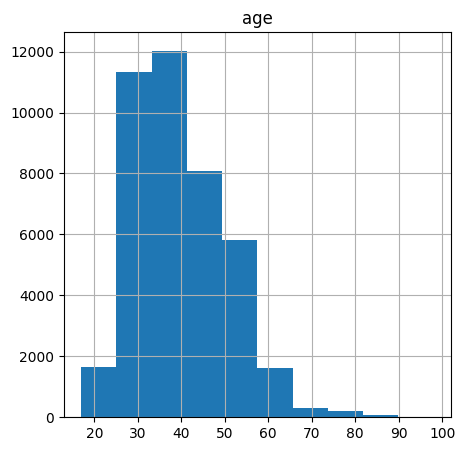

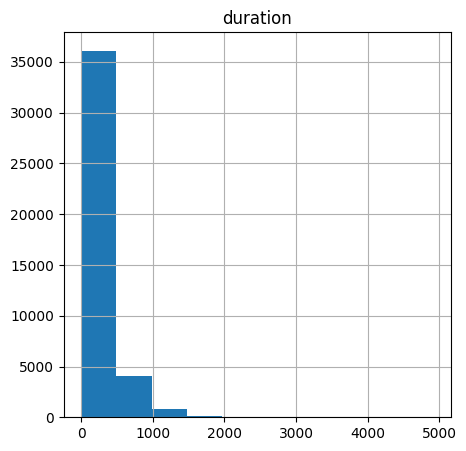

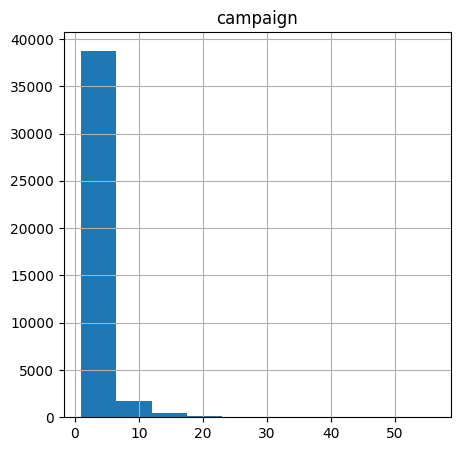

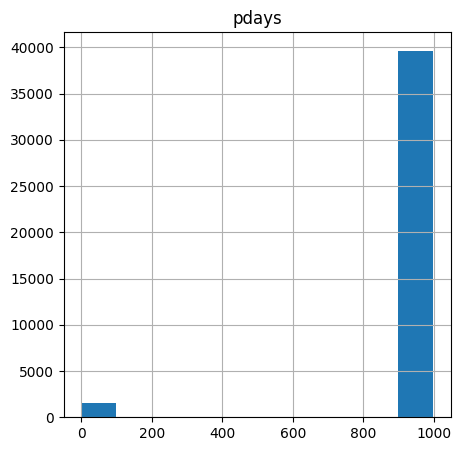

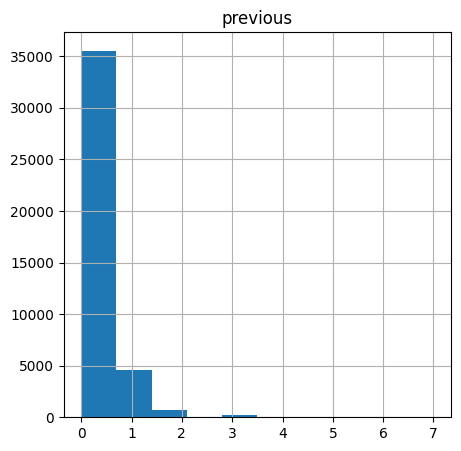

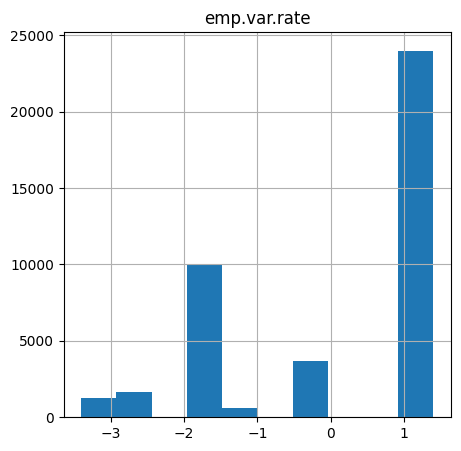

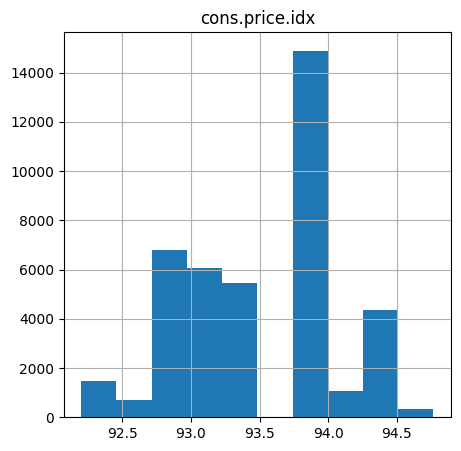

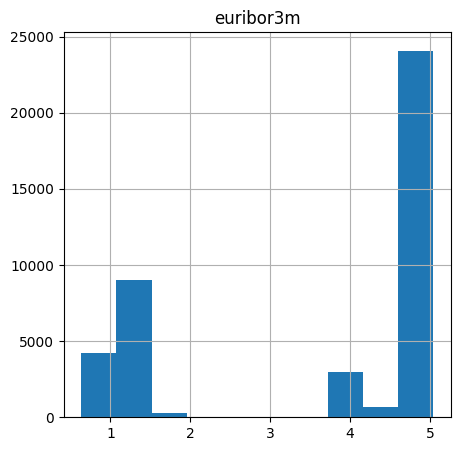

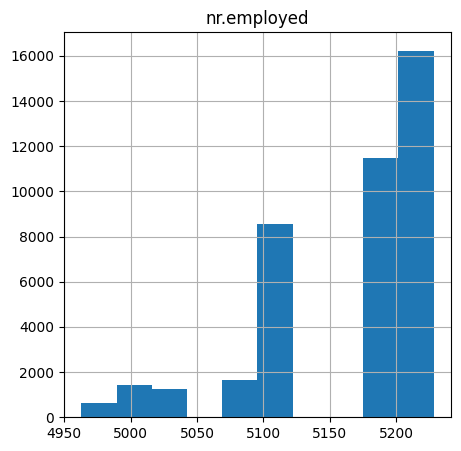

In [107]:
df['age'] = df['age'].astype('int64')
df.hist(column='age', figsize=(5, 5))

df['duration'] = df['duration'].astype('int64')
df.hist(column='duration', figsize=(5, 5))

df['campaign'] = df['campaign'].astype('int64')
df.hist(column='campaign', figsize=(5, 5))

df['pdays'] = df['pdays'].astype('int64')
df.hist(column='pdays', figsize=(5, 5))

df['previous'] = df['previous'].astype('int64')
df.hist(column='previous', figsize=(5, 5))

df['emp.var.rate'] = df['emp.var.rate'].astype('float64')
df.hist(column='emp.var.rate', figsize=(5, 5))

df['cons.price.idx'] = df['cons.price.idx'].astype('float64')
df.hist(column='cons.price.idx', figsize=(5, 5))

df['euribor3m'] = df['euribor3m'].astype('float64')
df.hist(column='euribor3m', figsize=(5, 5))

df['nr.employed'] = df['nr.employed'].astype('int64')
df.hist(column='nr.employed', figsize=(5, 5))

plt.show()

In [108]:
df.dtypes
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes


In [109]:
# PRE PROCESAMIENTO
from sklearn.model_selection import train_test_split
# Dummies para acomodar la data string a int
df = pd.get_dummies(df, columns=["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome", "y"])
X_train, X_test, y_train, y_test = train_test_split(df, df, random_state=1)
print(X_train.shape)
print(X_test.shape)

X_train

(30882, 21)
(10294, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
8663,35,technician,single,professional.course,no,yes,no,telephone,jun,wed,134,2,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228,no
25725,32,technician,married,university.degree,no,yes,no,cellular,nov,wed,405,2,999,0,nonexistent,-0.1,93.200,-42.0,4.120,5195,no
38608,35,management,single,university.degree,no,no,yes,cellular,nov,mon,75,2,999,0,nonexistent,-3.4,92.649,-30.1,0.722,5017,no
31458,36,entrepreneur,married,university.degree,no,yes,no,cellular,may,wed,239,2,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099,no
7990,40,services,divorced,high.school,no,no,no,telephone,jun,mon,158,1,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7814,60,management,married,university.degree,no,no,no,telephone,jun,mon,526,2,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228,yes
32521,29,blue-collar,single,basic.4y,unknown,yes,no,cellular,may,fri,340,2,999,1,failure,-1.8,92.893,-46.2,1.313,5099,no
5193,35,technician,married,professional.course,no,yes,yes,telephone,may,fri,14,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
12173,38,blue-collar,married,basic.9y,no,unknown,unknown,telephone,jul,tue,110,2,999,0,nonexistent,1.4,93.918,-42.7,4.955,5228,no


In [110]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963,yes


In [111]:


#el método fit calcula el mínimo y máximo del training set
scaler.fit(X_train)

ValueError: could not convert string to float: 'technician'

In [ ]:
# hace la efectiva transformación de datos
X_train_scaled = scaler.transform(X_train)
# imprimir datos antes y despues de escalar
print("transformed shape: {}".format(X_train_scaled.shape))
print("mínimo por característica antes de escalar:\n {}".format(X_train.min(axis=0)))
print("máximo por característica antes de escalar:\n {}".format(X_train.max(axis=0)))
print("mínimo por característica después de escalar:\n {}".format(
    X_train_scaled.min(axis=0)))
print("máximo por característica después de escalar:\n {}".format(
    X_train_scaled.max(axis=0)))